<a href="https://colab.research.google.com/github/YoshiAligina/Allstate1B/blob/main/allstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section we are importing necessary libraries to work on building our model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.ensemble import IsolationForest

Importing our csv file and examining it.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Allstate1B/claims_data.csv')
df.head()


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
df.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

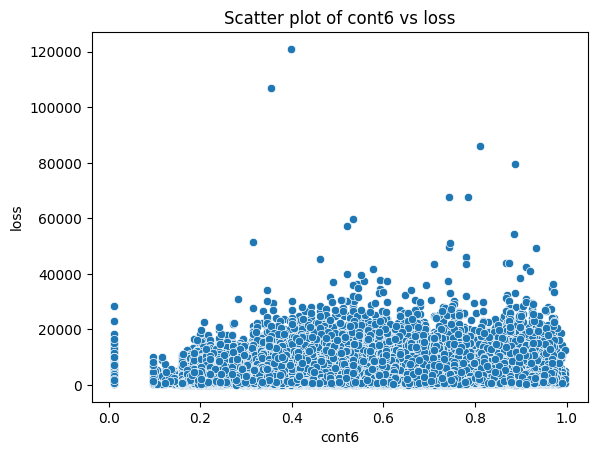

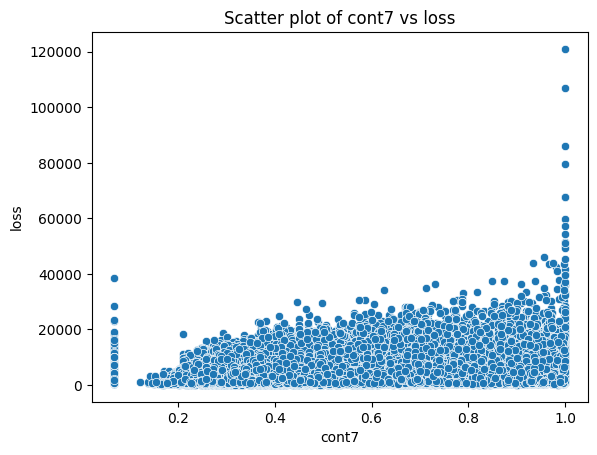

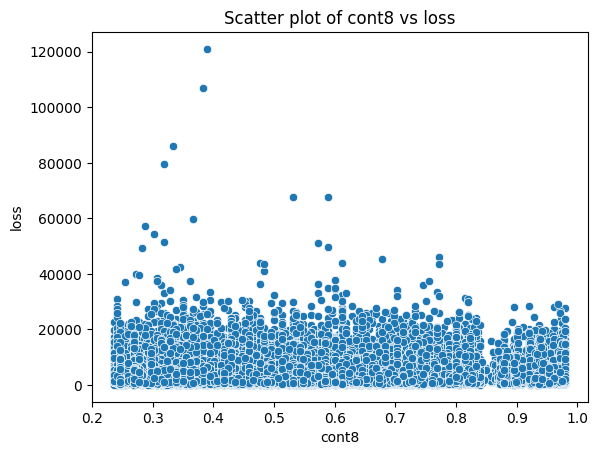

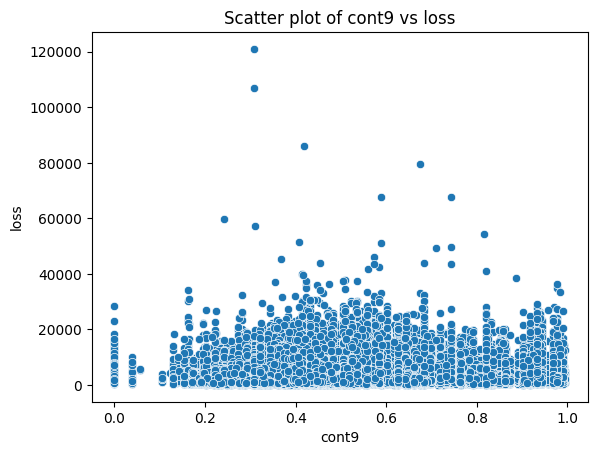

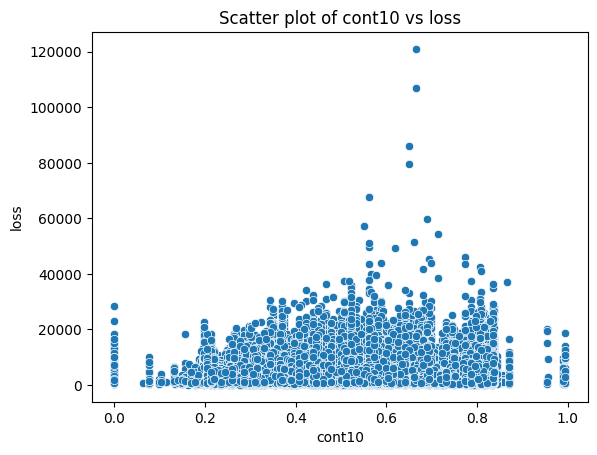

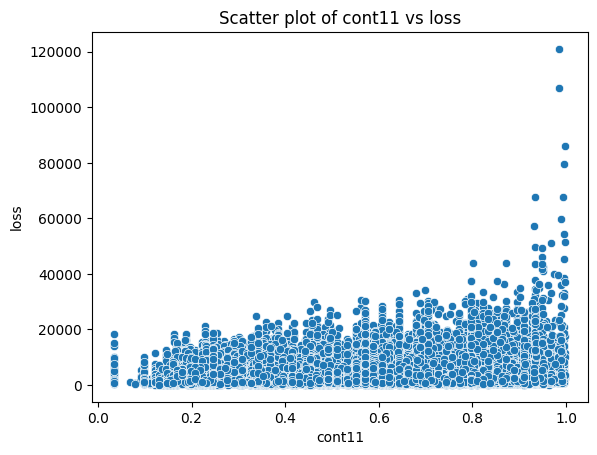

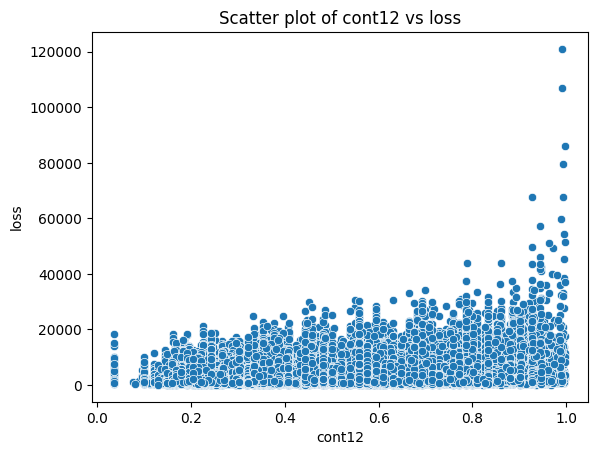

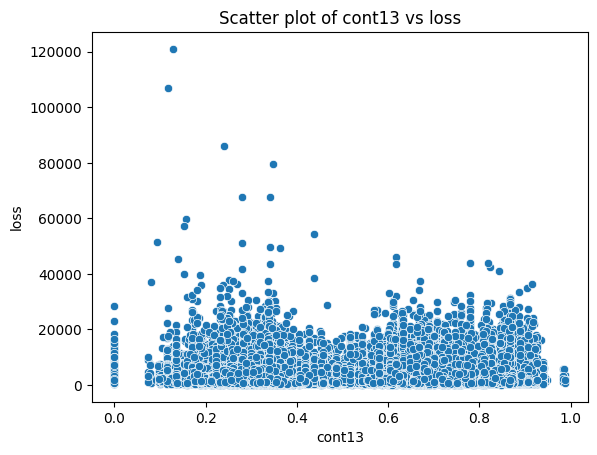

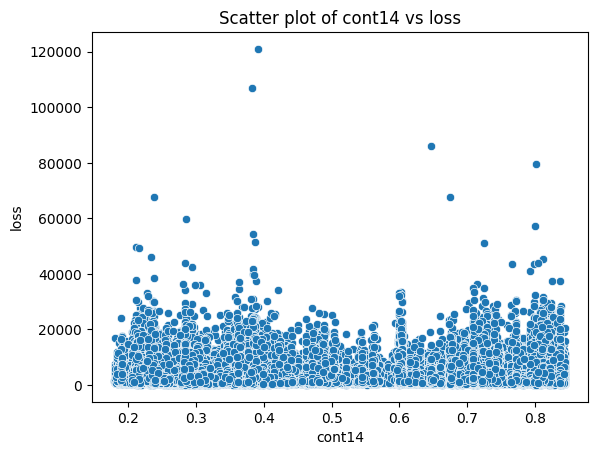

In [ ]:
label_column = "loss"
cont_feats =  ['cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14']
for feature in cont_feats:
    sns.scatterplot(x=feature, y=label_column, data=df)
    plt.title(f'Scatter plot of {feature} vs {label_column}')
    plt.xlabel(feature)
    plt.ylabel(label_column)
    plt.show()

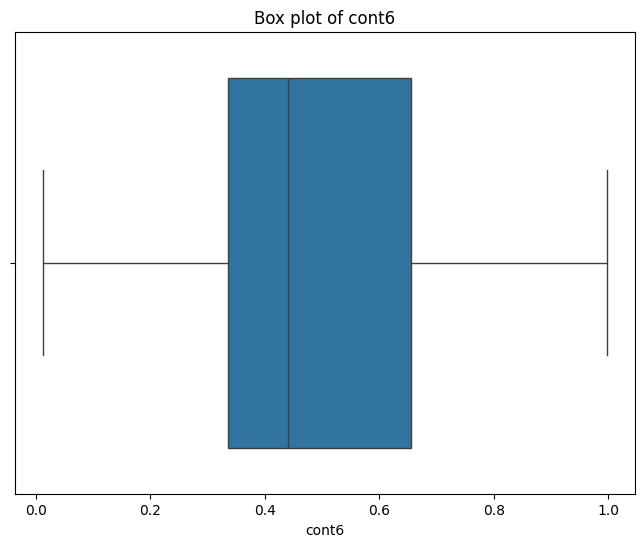

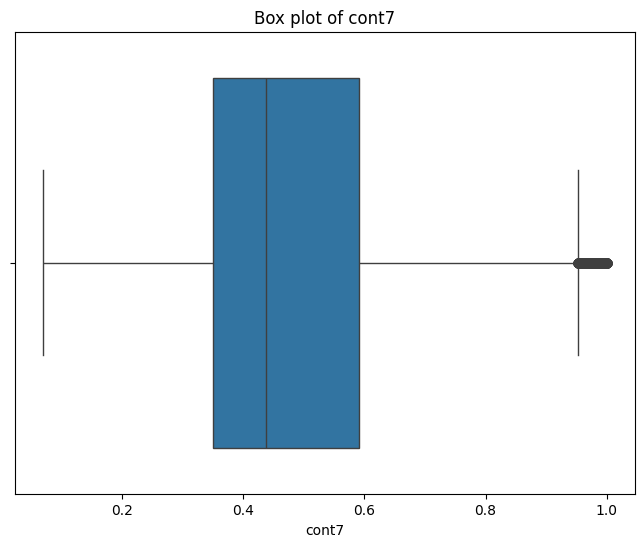

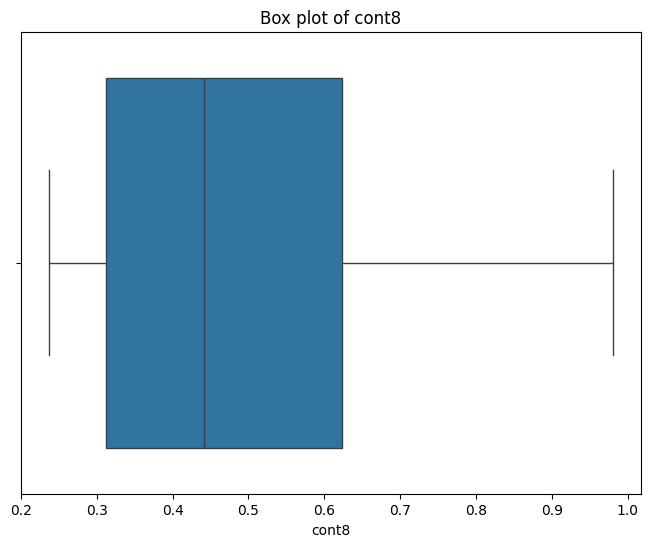

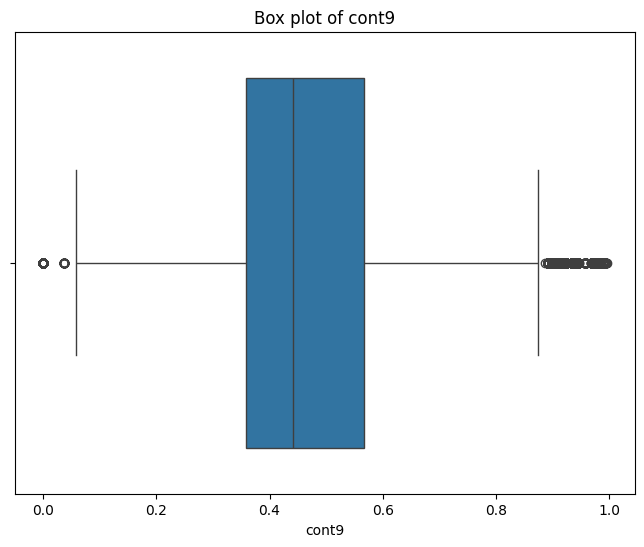

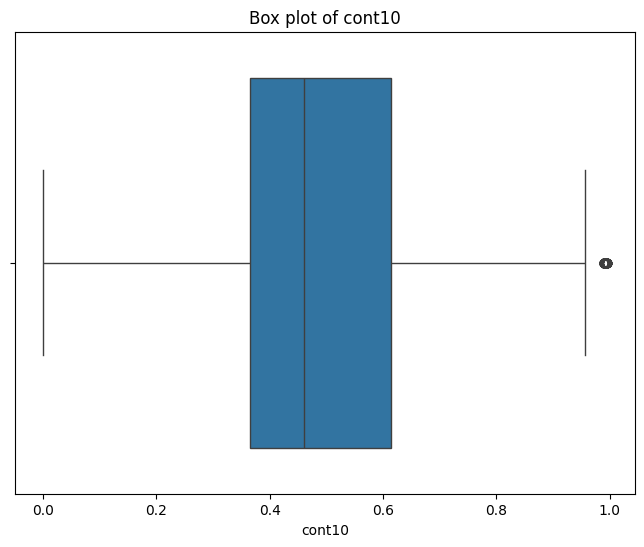

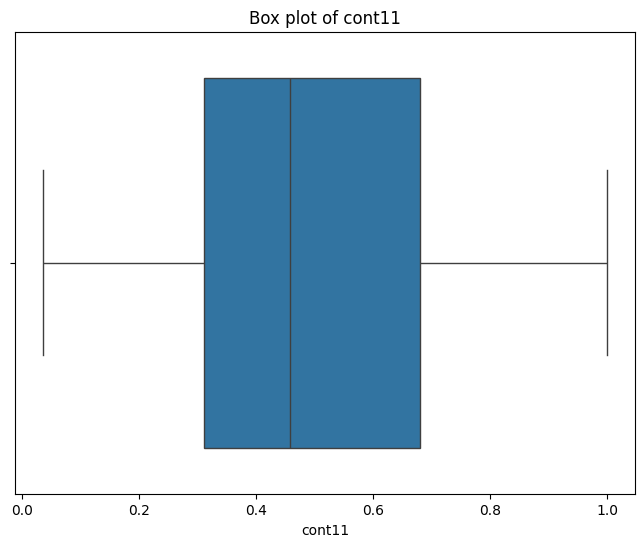

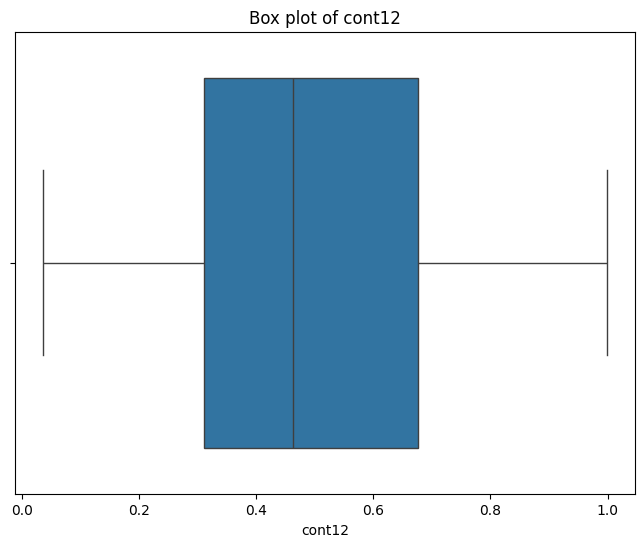

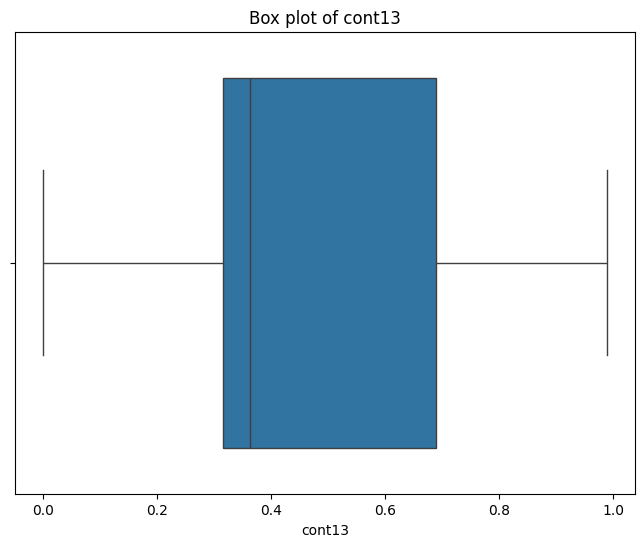

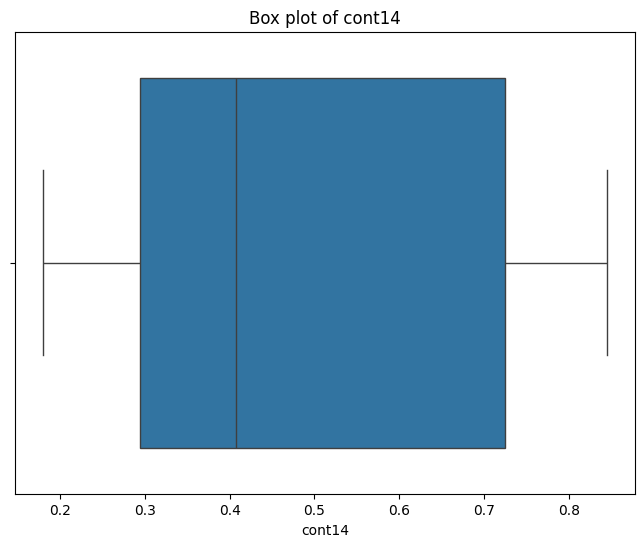

Outliers in cont6 using Z-score:
Empty DataFrame
Columns: [id, cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9, cat10, cat11, cat12, cat13, cat14, cat15, cat16, cat17, cat18, cat19, cat20, cat21, cat22, cat23, cat24, cat25, cat26, cat27, cat28, cat29, cat30, cat31, cat32, cat33, cat34, cat35, cat36, cat37, cat38, cat39, cat40, cat41, cat42, cat43, cat44, cat45, cat46, cat47, cat48, cat49, cat50, cat51, cat52, cat53, cat54, cat55, cat56, cat57, cat58, cat59, cat60, cat61, cat62, cat63, cat64, cat65, cat66, cat67, cat68, cat69, cat70, cat71, cat72, cat73, cat74, cat75, cat76, cat77, cat78, cat79, cat80, cat81, cat82, cat83, cat84, cat85, cat86, cat87, cat88, cat89, cat90, cat91, cat92, cat93, cat94, cat95, cat96, cat97, cat98, cat99, ...]
Index: []

[0 rows x 132 columns]
Outliers in cont7 using Z-score:
Empty DataFrame
Columns: [id, cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9, cat10, cat11, cat12, cat13, cat14, cat15, cat16, cat17, cat18, cat19, cat20, cat21, cat22, cat23,

In [ ]:
# Box plots for continuous features
for feature in cont_feats:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box plot of {feature}')
  plt.show()
for feature in cont_feats:
  z = np.abs(stats.zscore(df[feature]))
  # Threshold for identifying outliers
  threshold = 3 #Check for each varialbe individually.
  outliers = np.where(z > threshold)
  print(f"Outliers in {feature} using Z-score:")
  print(df.iloc[outliers])

# Using the Isolation Forest algorithm
for feature in cont_feats:
  model = IsolationForest()
  df['anomaly'] = model.fit_predict(df[[feature]])
  outliers = df[df['anomaly'] == -1]
  print(f"Outliers in {feature} using Isolation Forest:")
  print(outliers)
  df.drop('anomaly', axis=1, inplace=True)

In [ ]:
df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'